In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [17]:
with open('TrainData/train.pkl', 'rb') as f1, open('TestData/test.pkl', 'rb') as f2:
    train = pickle.load(f1)
    test = pickle.load(f2)

In [79]:
from sklearn.model_selection import train_test_split

X_train, X_test_dev, y_train, y_test_dev = train_test_split(train.drop('ReportedFraud', axis=1), train['ReportedFraud'], test_size=0.1)

In [6]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'n_estimators': [5, 10, 50, 100, 200, 500],
                'max_depth': [1, 2, 5, 10, 20, 50, 100, None],
                'min_samples_split': [2, 5, 10, 20, 30, 50],
                'min_samples_leaf': [1, 2, 5, 10, 20, 30, 50],
                'loss': ['deviance', 'exponential'],
                'learning_rate': [0.01, 0.1, 0.5, 1, 3],
                'subsample': [0.1, 0.3, 0.5, 1],
                'criterion': ['friedman_mse', 'squared_error']}

gbc = GradientBoostingClassifier()
rand_search = RandomizedSearchCV(gbc, param_grid, n_iter=150, cv=5, scoring='recall', n_jobs=-1, verbose=1)
rand_search.fit(X_train, y_train)

results = pd.DataFrame(rand_search.cv_results_)
results

Fitting 5 folds for each of 150 candidates, totalling 750 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_subsample,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_depth,param_loss,...,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,75.361450,1.740212,0.076017,0.002900,1,100,30,30,100,deviance,...,squared_error,"{'subsample': 1, 'n_estimators': 100, 'min_sam...",0.829651,0.826087,0.825374,0.821098,0.833215,0.827085,0.004097,6
1,7.911053,0.025162,0.013402,0.002416,0.5,200,2,1,2,deviance,...,friedman_mse,"{'subsample': 0.5, 'n_estimators': 200, 'min_s...",0.803991,0.821098,0.808268,0.823949,0.823236,0.816108,0.008312,20
2,0.340808,0.005319,0.009602,0.001358,0.1,10,50,30,10,deviance,...,friedman_mse,"{'subsample': 0.1, 'n_estimators': 10, 'min_sa...",0.787598,0.762651,0.780470,0.776194,0.780470,0.777477,0.008268,59
3,5.711239,0.028673,0.019605,0.000490,0.3,100,10,50,5,exponential,...,squared_error,"{'subsample': 0.3, 'n_estimators': 100, 'min_s...",0.786885,0.786885,0.796151,0.791875,0.796864,0.791732,0.004310,47
4,148.578051,30.864795,0.202870,0.049724,0.5,500,5,5,20,deviance,...,friedman_mse,"{'subsample': 0.5, 'n_estimators': 500, 'min_s...",0.817534,0.673557,0.026372,0.638632,0.627227,0.556664,0.273724,133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,6.973243,0.068774,0.063624,0.002042,0.1,200,20,20,10,deviance,...,friedman_mse,"{'subsample': 0.1, 'n_estimators': 200, 'min_s...",0.568068,0.547398,0.595866,0.605132,0.605132,0.584319,0.022921,126
146,18.164984,0.563680,0.047409,0.001020,0.3,50,5,1,None,exponential,...,friedman_mse,"{'subsample': 0.3, 'n_estimators': 50, 'min_sa...",0.746971,0.741981,0.758375,0.748396,0.755524,0.750249,0.005939,79
147,1.275860,0.007398,0.011601,0.000801,0.1,200,20,2,1,exponential,...,friedman_mse,"{'subsample': 0.1, 'n_estimators': 200, 'min_s...",0.722024,0.714184,0.730577,0.714897,0.714897,0.719316,0.006317,95
148,11.361274,0.060004,0.017603,0.001743,0.3,200,5,1,5,deviance,...,friedman_mse,"{'subsample': 0.3, 'n_estimators': 200, 'min_s...",0.760513,0.779758,0.771205,0.774056,0.802566,0.777619,0.013953,58


In [10]:
best5 = results.sort_values('rank_test_score').head(5)
best5.columns = best5.columns.str.replace('param_', '')
best5

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,subsample,n_estimators,min_samples_split,min_samples_leaf,max_depth,loss,...,criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
93,1.298691,0.012782,0.011402,0.000800,0.1,200,30,2,1,exponential,...,friedman_mse,"{'subsample': 0.1, 'n_estimators': 200, 'min_s...",0.915182,0.915182,0.929437,0.814683,0.928011,0.900499,0.043336,1
118,17.424453,0.062103,0.018804,0.002316,1,100,30,5,5,deviance,...,friedman_mse,"{'subsample': 1, 'n_estimators': 100, 'min_sam...",0.879544,0.811119,0.926586,0.769779,0.951532,0.867712,0.068448,2
36,0.072682,0.002039,0.005831,0.000828,0.1,5,2,10,2,deviance,...,squared_error,"{'subsample': 0.1, 'n_estimators': 5, 'min_sam...",0.980756,0.417676,0.970777,1.000000,0.886671,0.851176,0.220193,3
143,69.694673,0.390674,0.061414,0.001856,1,200,5,1,10,exponential,...,squared_error,"{'subsample': 1, 'n_estimators': 200, 'min_sam...",0.829651,0.831789,0.831789,0.828938,0.840342,0.832502,0.004082,4
29,116.398222,1.335002,0.099024,0.002096,1,200,5,30,20,exponential,...,squared_error,"{'subsample': 1, 'n_estimators': 200, 'min_sam...",0.828938,0.828225,0.826087,0.821810,0.840342,0.829081,0.006155,5


In [8]:
rand_search.best_params_

{'subsample': 0.1,
 'n_estimators': 200,
 'min_samples_split': 30,
 'min_samples_leaf': 2,
 'max_depth': 1,
 'loss': 'exponential',
 'learning_rate': 3,
 'criterion': 'friedman_mse'}

In [14]:
params = {'n_estimators': [100, 200],
    'min_samples_split': [10, 30],
    'min_samples_leaf': [1, 2, 5],
    'max_depth': [1, 5, 10],
    'loss': ['log_loss', 'exponential'],
    'learning_rate': [0.1, 0.5, 1],
    'subsample': [0.1, 0.5, 1],
    'criterion': ['friedman_mse', 'squared_error']}

gbc = GradientBoostingClassifier()
rand_search = RandomizedSearchCV(gbc, params, cv=5, n_iter = 100, scoring='recall', n_jobs=2, verbose=2)
rand_search.fit(X_train, y_train)   

results2 = pd.DataFrame(rand_search.cv_results_)
best5_grid = results2.sort_values('rank_test_score').head(5)
best5_grid.columns = best5_grid.columns.str.replace('param_', '')

best5_grid

Fitting 5 folds for each of 100 candidates, totalling 500 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,subsample,n_estimators,min_samples_split,min_samples_leaf,max_depth,loss,...,criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
26,70.771924,0.631066,0.060520,0.003039,1,200,10,2,10,exponential,...,friedman_mse,"{'subsample': 1, 'n_estimators': 200, 'min_sam...",0.833215,0.827512,0.832502,0.830364,0.836778,0.832074,0.003077,1
59,73.761618,0.162572,0.054209,0.003631,1,200,10,5,5,log_loss,...,friedman_mse,"{'subsample': 1, 'n_estimators': 200, 'min_sam...",0.829651,0.829651,0.835353,0.826087,0.839629,0.832074,0.004805,1
18,68.294204,0.195579,0.062533,0.003388,1,200,10,1,10,exponential,...,squared_error,"{'subsample': 1, 'n_estimators': 200, 'min_sam...",0.831789,0.831789,0.830364,0.823949,0.840342,0.831646,0.005226,3
78,66.636234,0.129607,0.058605,0.000715,1,200,30,5,10,log_loss,...,squared_error,"{'subsample': 1, 'n_estimators': 200, 'min_sam...",0.832502,0.828225,0.828938,0.823949,0.840342,0.830791,0.005495,4
35,34.434235,0.119625,0.024005,0.000151,1,200,10,1,5,log_loss,...,friedman_mse,"{'subsample': 1, 'n_estimators': 200, 'min_sam...",0.831076,0.828225,0.828938,0.823236,0.841768,0.830649,0.006125,5


In [15]:
best5_grid = best5_grid.drop(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 
                            'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score'], axis=1)
best5_grid

,subsample,n_estimators,min_samples_split,min_samples_leaf,max_depth,loss,learning_rate,criterion,params,mean_test_score,std_test_score,rank_test_score
26,1,200,10,2,10,exponential,0.5,friedman_mse,"{'subsample': 1, 'n_estimators': 200, 'min_sam...",0.832074,0.003077,1
59,1,200,10,5,5,log_loss,0.1,friedman_mse,"{'subsample': 1, 'n_estimators': 200, 'min_sam...",0.832074,0.004805,1
18,1,200,10,1,10,exponential,1,squared_error,"{'subsample': 1, 'n_estimators': 200, 'min_sam...",0.831646,0.005226,3
78,1,200,30,5,10,log_loss,0.5,squared_error,"{'subsample': 1, 'n_estimators': 200, 'min_sam...",0.830791,0.005495,4
35,1,200,10,1,5,log_loss,0.1,friedman_mse,"{'subsample': 1, 'n_estimators': 200, 'min_sam...",0.830649,0.006125,5


In [4]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
params = {'n_estimators': [150, 200, 250],
            'min_samples_split': [5, 10, 15],
            'min_samples_leaf': [2, 3, 5],
            'max_depth': [5, 8 ,10],
            'loss': ['log_loss', 'exponential'],
            'learning_rate': [0.1, 0.5, 1],
            'criterion': ['friedman_mse', 'squared_error'],
            'subsample': [0.8, 1]}

gbc = GradientBoostingClassifier()
rand_search = RandomizedSearchCV(gbc, params, cv=5, n_iter = 100, scoring='recall', n_jobs=-1, verbose=2)
rand_search.fit(X_train, y_train)   

results2 = pd.DataFrame(rand_search.cv_results_)
best5_grid = results2.sort_values('rank_test_score').head(5)
best5_grid.columns = best5_grid.columns.str.replace('param_', '')

Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [6]:
best5_grid = best5_grid.drop(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 
                            'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score'], axis=1)
best5_grid

,subsample,n_estimators,min_samples_split,min_samples_leaf,max_depth,loss,learning_rate,criterion,params,mean_test_score,std_test_score,rank_test_score
79,1,250,10,5,10,exponential,0.5,friedman_mse,"{'subsample': 1, 'n_estimators': 250, 'min_sam...",0.828640,0.008146,1
66,1,200,15,3,8,log_loss,0.1,friedman_mse,"{'subsample': 1, 'n_estimators': 200, 'min_sam...",0.827783,0.009631,2
25,1,250,10,5,10,log_loss,0.5,squared_error,"{'subsample': 1, 'n_estimators': 250, 'min_sam...",0.827640,0.007197,3
86,1,150,5,5,8,log_loss,0.1,squared_error,"{'subsample': 1, 'n_estimators': 150, 'min_sam...",0.827211,0.008878,4
57,1,250,10,2,10,exponential,0.5,friedman_mse,"{'subsample': 1, 'n_estimators': 250, 'min_sam...",0.827211,0.009197,5


In [8]:
from sklearn.model_selection import GridSearchCV
params = {'subsample': [0.1, 0.3],
            'n_estimators': [250],
            'min_samples_split': [30],
            'max_depth': [1],
            'learning_rate': [1, 3],
            'loss': ['exponential'],
            'criterion': ['friedman_mse'],
            'min_samples_leaf': [2, 3]}

gbc_anomal = GradientBoostingClassifier()
anomal_grid = GridSearchCV(gbc_anomal, params, scoring='recall', n_jobs=2, cv=5, verbose=20)
anomal_grid.fit(X_train, y_train)
anomal_results = pd.DataFrame(anomal_grid.cv_results_)
anomal_results_5 = anomal_results.drop(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 
                            'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score'], axis=1)
anomal_results_5

Fitting 5 folds for each of 8 candidates, totalling 40 fits


,param_criterion,param_learning_rate,param_loss,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,param_subsample,params,mean_test_score,std_test_score,rank_test_score
0,friedman_mse,1,exponential,1,2,30,250,0.1,"{'criterion': 'friedman_mse', 'learning_rate':...",0.733747,0.018412,8
1,friedman_mse,1,exponential,1,2,30,250,0.3,"{'criterion': 'friedman_mse', 'learning_rate':...",0.761472,0.012807,6
2,friedman_mse,1,exponential,1,3,30,250,0.1,"{'criterion': 'friedman_mse', 'learning_rate':...",0.747601,0.023253,7
3,friedman_mse,1,exponential,1,3,30,250,0.3,"{'criterion': 'friedman_mse', 'learning_rate':...",0.768761,0.008884,5
4,friedman_mse,3,exponential,1,2,30,250,0.1,"{'criterion': 'friedman_mse', 'learning_rate':...",0.916821,0.007165,1
5,friedman_mse,3,exponential,1,2,30,250,0.3,"{'criterion': 'friedman_mse', 'learning_rate':...",0.812319,0.193191,4
6,friedman_mse,3,exponential,1,3,30,250,0.1,"{'criterion': 'friedman_mse', 'learning_rate':...",0.912962,0.011962,2
7,friedman_mse,3,exponential,1,3,30,250,0.3,"{'criterion': 'friedman_mse', 'learning_rate':...",0.910245,0.010722,3


In [12]:
anomal_results_5.sort_values(by='mean_test_score', ascending=False)

,param_criterion,param_learning_rate,param_loss,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,param_subsample,params,mean_test_score,std_test_score,rank_test_score
4,friedman_mse,3,exponential,1,2,30,250,0.1,"{'criterion': 'friedman_mse', 'learning_rate':...",0.916821,0.007165,1
6,friedman_mse,3,exponential,1,3,30,250,0.1,"{'criterion': 'friedman_mse', 'learning_rate':...",0.912962,0.011962,2
7,friedman_mse,3,exponential,1,3,30,250,0.3,"{'criterion': 'friedman_mse', 'learning_rate':...",0.910245,0.010722,3
5,friedman_mse,3,exponential,1,2,30,250,0.3,"{'criterion': 'friedman_mse', 'learning_rate':...",0.812319,0.193191,4
3,friedman_mse,1,exponential,1,3,30,250,0.3,"{'criterion': 'friedman_mse', 'learning_rate':...",0.768761,0.008884,5
1,friedman_mse,1,exponential,1,2,30,250,0.3,"{'criterion': 'friedman_mse', 'learning_rate':...",0.761472,0.012807,6
2,friedman_mse,1,exponential,1,3,30,250,0.1,"{'criterion': 'friedman_mse', 'learning_rate':...",0.747601,0.023253,7
0,friedman_mse,1,exponential,1,2,30,250,0.1,"{'criterion': 'friedman_mse', 'learning_rate':...",0.733747,0.018412,8


In [14]:
params = {'subsample': [0.1, 0.2],
            'n_estimators': [250, 300],
            'min_samples_split': [30, 35],
            'max_depth': [1],
            'learning_rate': [3, 4],
            'loss': ['exponential'],
            'criterion': ['friedman_mse'],
            'min_samples_leaf': [1, 2]}

gbc_anomal = GradientBoostingClassifier()
anomal_grid = GridSearchCV(gbc_anomal, params, scoring='recall', n_jobs=2, cv=5, verbose=20)
anomal_grid.fit(X_train, y_train)
anomal_results = pd.DataFrame(anomal_grid.cv_results_)
anomal_results_5 = anomal_results.drop(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 
                            'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score'], axis=1)
anomal_results_5.sort_values(by='mean_test_score', ascending=False)[:5]

Fitting 5 folds for each of 32 candidates, totalling 160 fits


,param_criterion,param_learning_rate,param_loss,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,param_subsample,params,mean_test_score,std_test_score,rank_test_score
17,friedman_mse,4,exponential,1,1,30,250,0.2,"{'criterion': 'friedman_mse', 'learning_rate':...",0.998285,0.001246,1
23,friedman_mse,4,exponential,1,1,35,300,0.2,"{'criterion': 'friedman_mse', 'learning_rate':...",0.997570,0.002735,2
27,friedman_mse,4,exponential,1,2,30,300,0.2,"{'criterion': 'friedman_mse', 'learning_rate':...",0.997284,0.002279,3
25,friedman_mse,4,exponential,1,2,30,250,0.2,"{'criterion': 'friedman_mse', 'learning_rate':...",0.997142,0.002390,4
31,friedman_mse,4,exponential,1,2,35,300,0.2,"{'criterion': 'friedman_mse', 'learning_rate':...",0.997142,0.002515,5


In [20]:
from sklearn.metrics import classification_report

X_tr, X_test, y_tr, y_test = train_test_split(X_train, y_train)
gbc_best = GradientBoostingClassifier(**anomal_grid.best_params_)
gbc_best.fit(X_train, y_train)

print(anomal_grid.best_params_)
print('test: \n', classification_report(gbc_best.predict(X_test), y_test))
print('train: \n', classification_report(gbc_best.predict(X_tr), y_tr))
print('test_dev: \n', classification_report(gbc_best.predict(X_test_dev), y_test_dev))

{'criterion': 'friedman_mse', 'learning_rate': 4, 'loss': 'exponential', 'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 30, 'n_estimators': 250, 'subsample': 0.2}
test: 
               precision    recall  f1-score   support

           0       0.00      0.93      0.01        14
           1       1.00      0.27      0.42      6474

    accuracy                           0.27      6488
   macro avg       0.50      0.60      0.21      6488
weighted avg       1.00      0.27      0.42      6488

train: 
               precision    recall  f1-score   support

           0       0.00      0.97      0.00        34
           1       1.00      0.27      0.43     19430

    accuracy                           0.27     19464
   macro avg       0.50      0.62      0.22     19464
weighted avg       1.00      0.27      0.43     19464

test_dev: 
               precision    recall  f1-score   support

           0       0.00      1.00      0.01         6
           1       1.00      0.2

In [22]:
X_tr, X_test, y_tr, y_test = train_test_split(X_train, y_train)
gbc = GradientBoostingClassifier(**rand_search.best_params_)
gbc.fit(X_tr, y_tr)

print(rand_search.best_params_)
print('test: \n', classification_report(gbc.predict(X_test), y_test))
print('train: \n', classification_report(gbc.predict(X_tr), y_tr))
print('test_dev: \n', classification_report(gbc.predict(X_test_dev), y_test_dev))

{'subsample': 1, 'n_estimators': 250, 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_depth': 10, 'loss': 'exponential', 'learning_rate': 0.5, 'criterion': 'friedman_mse'}
test: 
               precision    recall  f1-score   support

           0       0.97      0.94      0.96      4932
           1       0.82      0.92      0.87      1556

    accuracy                           0.93      6488
   macro avg       0.90      0.93      0.91      6488
weighted avg       0.94      0.93      0.93      6488

train: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     14197
           1       1.00      1.00      1.00      5267

    accuracy                           1.00     19464
   macro avg       1.00      1.00      1.00     19464
weighted avg       1.00      1.00      1.00     19464

test_dev: 
               precision    recall  f1-score   support

           0       0.98      0.94      0.96      2193
           1       0.82      0.

In [33]:
params = {'subsample': 0.3, 'n_estimators': 600, 'min_samples_split': 15,
             'min_samples_leaf': 10, 'max_depth': 8, 'loss': 'exponential', 
             'learning_rate': 0.01, 'criterion': 'friedman_mse',
             'max_features': 10}

X_tr, X_test, y_tr, y_test = train_test_split(X_train, y_train)

gbc = GradientBoostingClassifier(**params)
gbc.fit(X_tr, y_tr)

print('train: \n', classification_report(gbc.predict(X_tr), y_tr))
print('test: \n', classification_report(gbc.predict(X_test), y_test))
print('test_dev: \n', classification_report(gbc.predict(X_test_dev), y_test_dev))

train: 
               precision    recall  f1-score   support

           0       0.98      0.94      0.96     14935
           1       0.82      0.94      0.88      4529

    accuracy                           0.94     19464
   macro avg       0.90      0.94      0.92     19464
weighted avg       0.94      0.94      0.94     19464

test: 
               precision    recall  f1-score   support

           0       0.98      0.93      0.95      4925
           1       0.80      0.94      0.86      1563

    accuracy                           0.93      6488
   macro avg       0.89      0.93      0.91      6488
weighted avg       0.94      0.93      0.93      6488

test_dev: 
               precision    recall  f1-score   support

           0       0.98      0.93      0.96      2239
           1       0.80      0.94      0.87       645

    accuracy                           0.93      2884
   macro avg       0.89      0.94      0.91      2884
weighted avg       0.94      0.93      0.94  

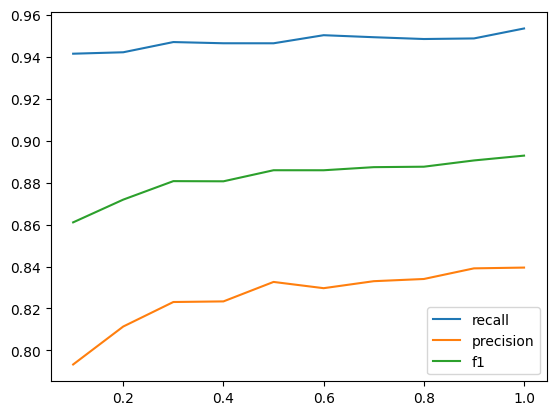

In [35]:
from sklearn.metrics import precision_score, recall_score, f1_score

subs = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

recalls = []
precisions = []
f1s = []
recalls_test = []
precisions_test = []
f1s_test = []

for sub in subs:
    X_tr, X_test, y_tr, y_test = train_test_split(X_train, y_train)
    params = {'subsample': sub, 'n_estimators': 600, 'min_samples_split': 15,
             'min_samples_leaf': 10, 'max_depth': 8, 'loss': 'exponential', 
             'learning_rate': 0.01, 'criterion': 'friedman_mse',
             'max_features': 10}
    gbc = GradientBoostingClassifier(**params)
    gbc.fit(X_tr, y_tr)

    recalls_test.append(recall_score(gbc.predict(X_test), y_test))
    precisions_test.append(precision_score(gbc.predict(X_test), y_test))
    f1s_test.append(f1_score(gbc.predict(X_test), y_test))

    recalls.append(recall_score(gbc.predict(X_tr), y_tr))
    precisions.append(precision_score(gbc.predict(X_tr), y_tr))
    f1s.append(f1_score(gbc.predict(X_tr), y_tr))

plt.plot(subs, recalls_test, label='recall_test')
plt.plot(subs, precisions_test, label='precision_test')
plt.plot(subs, f1s_test, label='f1_test')
plt.plot(subs, recalls, label='recall')
plt.plot(subs, precisions, label='precision')
plt.plot(subs, f1s, label='f1')
plt.legend()
plt.show()


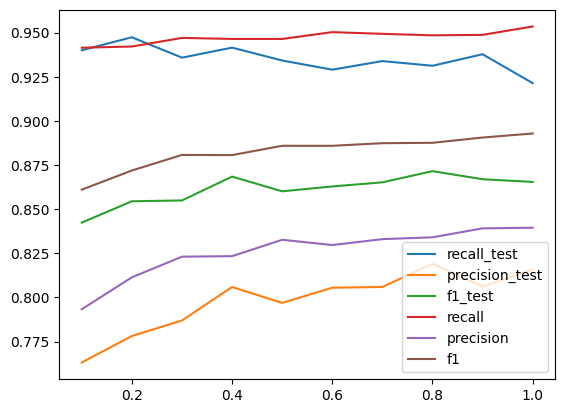

In [36]:
plt.plot(subs, recalls_test, label='recall_test')
plt.plot(subs, precisions_test, label='precision_test')
plt.plot(subs, f1s_test, label='f1_test')
plt.plot(subs, recalls, label='recall')
plt.plot(subs, precisions, label='precision')
plt.plot(subs, f1s, label='f1')
plt.legend()
plt.show()

subsample = 0.2

In [58]:
def plot_learning(feature_name, feature_values):    
    recalls = []
    precisions = []
    f1s = []
    recalls_test = []
    precisions_test = []
    f1s_test = []

    for value in feature_values:
        X_tr, X_test, y_tr, y_test = train_test_split(X_train, y_train)
        params = {'subsample': 0.2, 'n_estimators': 620, 
                    'min_samples_split': 12, 'min_samples_leaf': 15, 
                    'max_depth': 10, 'loss': 'exponential', 
                    'learning_rate': 0.01, 'criterion': 'friedman_mse', 
                    'max_features': 15, 
                    feature_name: value}

        gbc = GradientBoostingClassifier(**params)
        gbc.fit(X_tr, y_tr)

        recalls_test.append(recall_score(gbc.predict(X_test), y_test))
        precisions_test.append(precision_score(gbc.predict(X_test), y_test))
        f1s_test.append(f1_score(gbc.predict(X_test), y_test))

        recalls.append(recall_score(gbc.predict(X_tr), y_tr))
        precisions.append(precision_score(gbc.predict(X_tr), y_tr))
        f1s.append(f1_score(gbc.predict(X_tr), y_tr))

    plt.plot(feature_values, recalls_test, label='recall_test')
    plt.plot(feature_values, precisions_test, label='precision_test')
    plt.plot(feature_values, f1s_test, label='f1_test')
    plt.plot(feature_values, recalls, label='recall')
    plt.plot(feature_values, precisions, label='precision')
    plt.plot(feature_values, f1s, label='f1')
    plt.title(feature_name)
    plt.legend()
    plt.show()

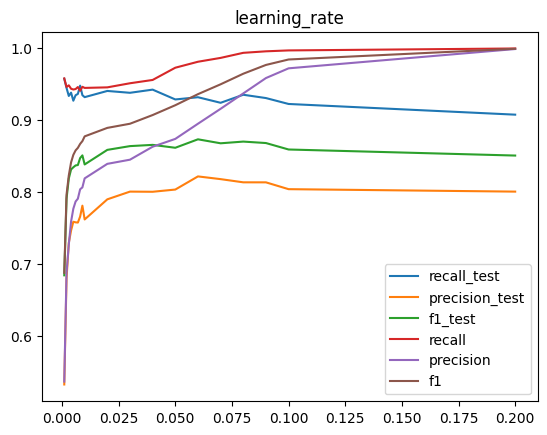

In [49]:
plot_learning('learning_rate', [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2])

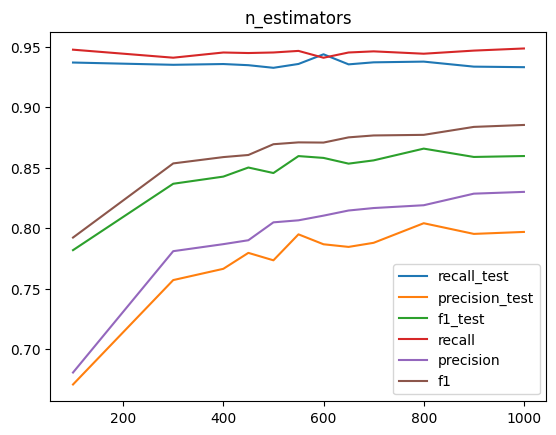

In [50]:
plot_learning('n_estimators', [100, 300, 400, 450, 500, 550, 600, 650, 700, 800, 900, 1000])

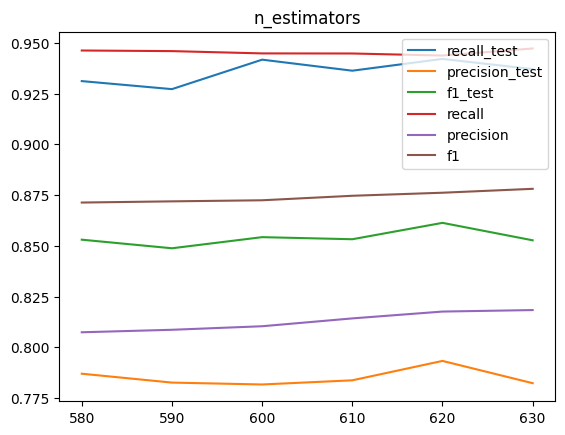

In [51]:
plot_learning('n_estimators', [580, 590, 600, 610, 620, 630])

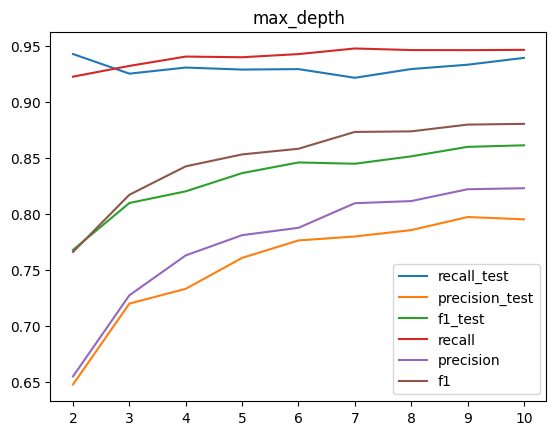

In [53]:
plot_learning('max_depth', [2, 3, 4, 5, 6, 7, 8, 9, 10])

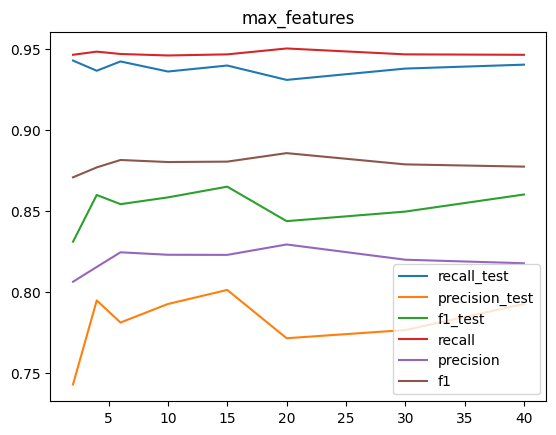

In [55]:
plot_learning('max_features', [2, 4, 6, 10, 15, 20, 30, 40])

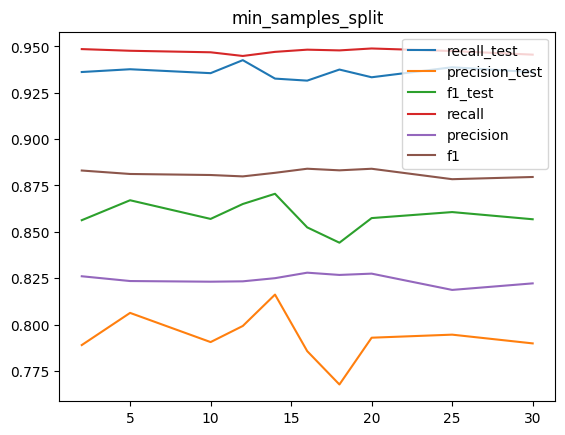

In [57]:
plot_learning('min_samples_split', [2, 5, 10, 12, 14, 16, 18, 20, 25, 30])

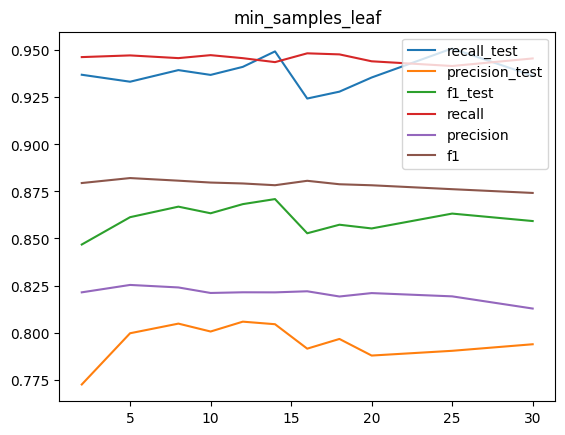

In [59]:
plot_learning('min_samples_leaf', [2, 5, 8, 10, 12, 14, 16, 18, 20, 25, 30])

In [64]:
from sklearn.model_selection import cross_val_predict

X_tr, X_test, y_tr, y_test = train_test_split(X_train, y_train)
best_params = {'subsample': 0.2, 'n_estimators': 620, 
            'min_samples_split': 12, 'min_samples_leaf': 15, 
            'max_depth': 10, 'loss': 'exponential', 
            'learning_rate': 0.01, 'criterion': 'friedman_mse', 
            'max_features': 15}

gbc = GradientBoostingClassifier(**best_params)
gbc.fit(X_tr, y_tr)

y_pred = gbc.predict(X_test)    
print('test: \n', classification_report(y_test, y_pred))
print('train: \n', classification_report(y_tr, gbc.predict(X_tr)))
print('dev: \n', classification_report(y_test_dev, gbc.predict(X_test_dev)))

test: 
               precision    recall  f1-score   support

           0       0.93      0.98      0.95      4713
           1       0.94      0.79      0.86      1775

    accuracy                           0.93      6488
   macro avg       0.93      0.89      0.91      6488
weighted avg       0.93      0.93      0.93      6488

train: 
               precision    recall  f1-score   support

           0       0.94      0.98      0.96     14235
           1       0.94      0.82      0.88      5229

    accuracy                           0.94     19464
   macro avg       0.94      0.90      0.92     19464
weighted avg       0.94      0.94      0.94     19464

dev: 
               precision    recall  f1-score   support

           0       0.93      0.98      0.95      2103
           1       0.93      0.80      0.86       781

    accuracy                           0.93      2884
   macro avg       0.93      0.89      0.91      2884
weighted avg       0.93      0.93      0.93      2

In [72]:
train_positive = train[train['ReportedFraud'] == 1]
train_negative = train[train['ReportedFraud'] == 0]

n_samples = round(len(train_positive) * 0.5)
train_negative = train_negative.sample(n=n_samples)
train_strat = pd.concat([train_positive, train_negative])

X_train_str, X_test_dev_str, y_train_str, y_test_dev_str = train_test_split(train_strat.drop('ReportedFraud', axis=1), train_strat['ReportedFraud'], test_size=0.1)

In [73]:
X_tr, X_test, y_tr, y_test = train_test_split(X_train_str, y_train_str)
best_params = {'subsample': 0.4, 'n_estimators': 620, 
            'min_samples_split': 12, 'min_samples_leaf': 15, 
            'max_depth': 10, 'loss': 'exponential', 
            'learning_rate': 0.01, 'criterion': 'friedman_mse', 
            'max_features': 15}

gbc = GradientBoostingClassifier(**best_params)
gbc.fit(X_tr, y_tr)

y_pred = gbc.predict(X_test)    
print('train: \n', classification_report(y_tr, gbc.predict(X_tr)))
print('test: \n', classification_report(y_test, y_pred))
print('dev: \n', classification_report(y_test_dev_str, gbc.predict(X_test_dev_str)))

train: 
               precision    recall  f1-score   support

           0       0.87      0.98      0.92      2601
           1       0.99      0.93      0.96      5280

    accuracy                           0.94      7881
   macro avg       0.93      0.95      0.94      7881
weighted avg       0.95      0.94      0.94      7881

test: 
               precision    recall  f1-score   support

           0       0.76      0.90      0.82       892
           1       0.94      0.86      0.90      1736

    accuracy                           0.87      2628
   macro avg       0.85      0.88      0.86      2628
weighted avg       0.88      0.87      0.87      2628

dev: 
               precision    recall  f1-score   support

           0       0.79      0.87      0.83       399
           1       0.93      0.88      0.91       769

    accuracy                           0.88      1168
   macro avg       0.86      0.88      0.87      1168
weighted avg       0.88      0.88      0.88      1

In [81]:
from sklearn.metrics import  make_scorer

recall_label_1 = make_scorer(recall_score, pos_label=1)

param_grid = {'n_estimators': [500, 600],
                'max_depth': [5, 10, 15],
                'min_samples_split': [5, 10, 15],
                'min_samples_leaf': [10, 15, 20],
                'loss': ['log_loss', 'exponential'],
                'learning_rate': [0.01, 0.05],
                'subsample': [0.1, 0.3],
                'criterion': ['friedman_mse', 'squared_error'],
                'max_features': [5, 10, 15]}

gbc = GradientBoostingClassifier()
rand_search = RandomizedSearchCV(gbc, param_grid, n_iter=100, cv=5, scoring=recall_label_1, n_jobs=2, verbose=100)
rand_search.fit(X_train, y_train)
results = pd.DataFrame(rand_search.cv_results_)
results.sort_values('rank_test_score').head(10)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


c:\Users\nikit\anaconda3\envs\data_analytics\lib\site-packages\sklearn\ensemble\_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_subsample,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,...,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
43,21.239755,0.082136,0.195669,0.001007,0.3,600,10,20,10,10,...,friedman_mse,"{'subsample': 0.3, 'n_estimators': 600, 'min_s...",0.843972,0.828369,0.811214,0.802837,0.824113,0.822101,0.014222,1
66,23.339305,0.090611,0.157433,0.002654,0.3,500,10,15,15,10,...,squared_error,"{'subsample': 0.3, 'n_estimators': 500, 'min_s...",0.843972,0.829787,0.807665,0.806383,0.821986,0.821959,0.014091,2
88,27.600182,0.417899,0.187690,0.004174,0.3,600,10,20,15,10,...,friedman_mse,"{'subsample': 0.3, 'n_estimators': 600, 'min_s...",0.841135,0.825532,0.804116,0.809929,0.819149,0.819972,0.012897,3
46,21.279714,0.086858,0.194649,0.001625,0.3,600,5,20,10,10,...,squared_error,"{'subsample': 0.3, 'n_estimators': 600, 'min_s...",0.836170,0.827660,0.811923,0.806383,0.817021,0.819831,0.010766,4
84,29.039318,0.094557,0.199116,0.014071,0.3,600,5,10,15,10,...,squared_error,"{'subsample': 0.3, 'n_estimators': 600, 'min_s...",0.839716,0.826241,0.805536,0.809929,0.816312,0.819547,0.012255,5
75,11.639475,0.053386,0.163855,0.001329,0.3,500,15,15,5,10,...,squared_error,"{'subsample': 0.3, 'n_estimators': 500, 'min_s...",0.834043,0.824113,0.809084,0.803546,0.812766,0.816711,0.010975,6
97,11.536392,0.052361,0.160388,0.001867,0.3,500,15,20,5,10,...,squared_error,"{'subsample': 0.3, 'n_estimators': 500, 'min_s...",0.839007,0.824113,0.807665,0.797872,0.812766,0.816285,0.014165,7
70,30.685648,0.071946,0.219508,0.001651,0.3,500,15,15,15,15,...,squared_error,"{'subsample': 0.3, 'n_estimators': 500, 'min_s...",0.831206,0.824113,0.806246,0.801418,0.814184,0.815434,0.011014,8
12,22.759227,0.094172,0.218656,0.002887,0.3,500,15,20,10,15,...,friedman_mse,"{'subsample': 0.3, 'n_estimators': 500, 'min_s...",0.836879,0.818440,0.806955,0.800709,0.809220,0.814441,0.012580,9
35,21.681009,0.081227,0.203371,0.001850,0.3,600,10,15,10,10,...,friedman_mse,"{'subsample': 0.3, 'n_estimators': 600, 'min_s...",0.831915,0.821277,0.806246,0.801418,0.811348,0.814441,0.010940,10


In [82]:
gbc_best = rand_search.best_estimator_
gbc_best.fit(X_train, y_train)
y_pred = gbc_best.predict(X_test_dev)
print(classification_report(y_test_dev, y_pred))


c:\Users\nikit\anaconda3\envs\data_analytics\lib\site-packages\sklearn\ensemble\_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.95      0.97      0.96      2148
           1       0.92      0.84      0.88       736

    accuracy                           0.94      2884
   macro avg       0.93      0.91      0.92      2884
weighted avg       0.94      0.94      0.94      2884

